<a href="https://colab.research.google.com/github/hamsungmin/DataTrainAnalysis/blob/main/Project/MobileGame/3.user_segmentation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코호트 + 세그멘테이션

In [14]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# 데이터 불러오기
users = pd.read_csv('/content/drive/MyDrive/MobileGame/users.csv')


In [16]:
# 코호트 분석 (주 단위)
users['install_date'] = pd.to_datetime(users['install_date'])
users['install_week'] = users['install_date'].dt.isocalendar().week

In [17]:
# K-means 클러스터링
features = users[['session_count', 'total_spend', 'in_game_events']]
kmeans = KMeans(n_clusters=3, random_state=42)
users['cluster'] = kmeans.fit_predict(features)

In [18]:
# 클러스터별 평균 값
cluster_summary = users.groupby('cluster')[['session_count','total_spend','in_game_events']].mean()
print(cluster_summary)

         session_count  total_spend  in_game_events
cluster                                            
0            10.070383    13.334714       36.932924
1            10.024570    57.654939       24.540541
2             9.977284    13.512093       11.633639


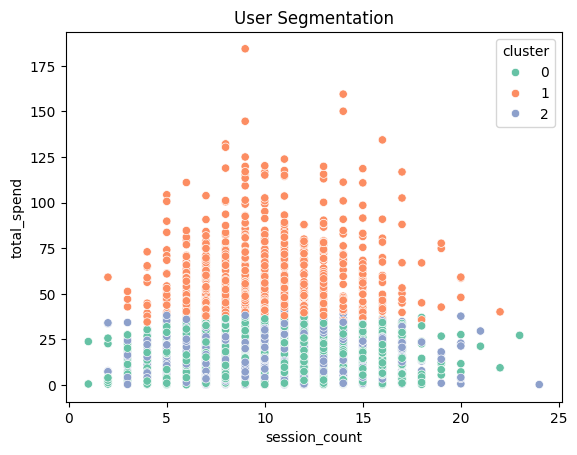

In [19]:
# 시각화
sns.scatterplot(data=users, x='session_count', y='total_spend', hue='cluster', palette='Set2')
plt.title("User Segmentation")
plt.show()

In [20]:
# 개인화 추천 예시
recommendation = {
    0: "High-value users → VIP rewards, exclusive events",
    1: "Moderate users → Incentivized retention campaigns",
    2: "Low-value users → Re-engagement notifications"
}
users['recommendation'] = users['cluster'].map(recommendation)